# HW03: due October 18th 

The goal of this homework is to **predict** the value of houses in California starting from house and neighborhood caracteristics. 

Differently from last week's homework, we are not interested in investigating the causal effect of some features on house values, but the main purpose is to obtain good predictions of the values, so to train the best model to minimize the loss function. 

In [2]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [3]:
# Load Data
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

20640 8


In [5]:
X_df=pd.DataFrame(X_full, columns=data['feature_names'])
X_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Summary Statistics

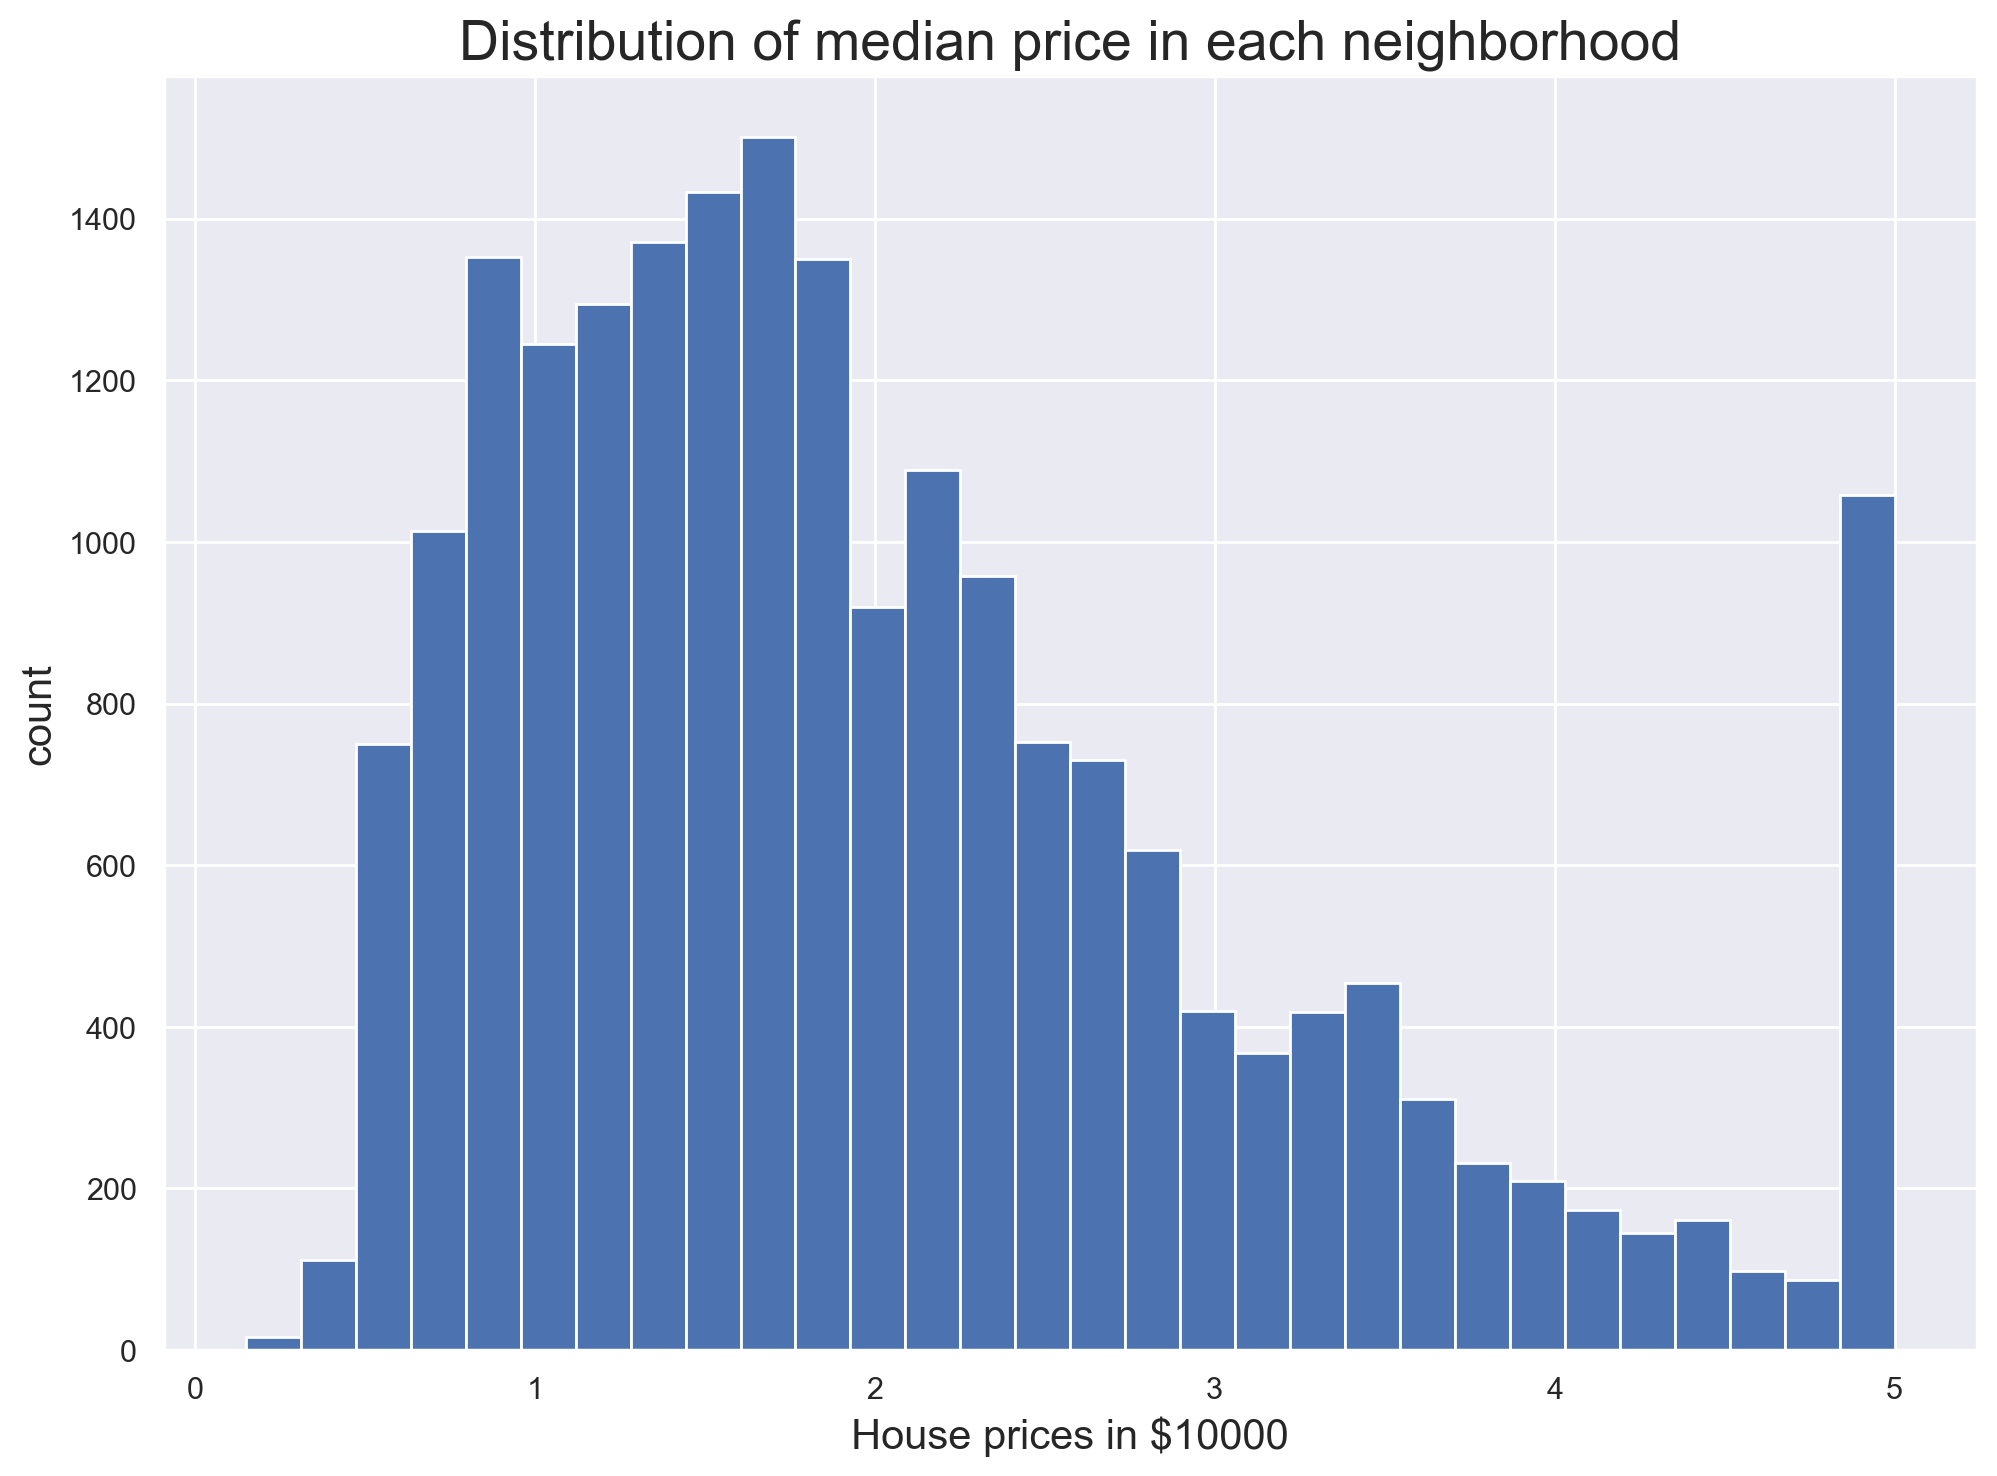

In [6]:
from seaborn import distplot
# make a histogram of the label variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y_full, bins=30)
plt.xlabel("House prices in $10000", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of median price in each neighborhood', size=20)
plt.show()

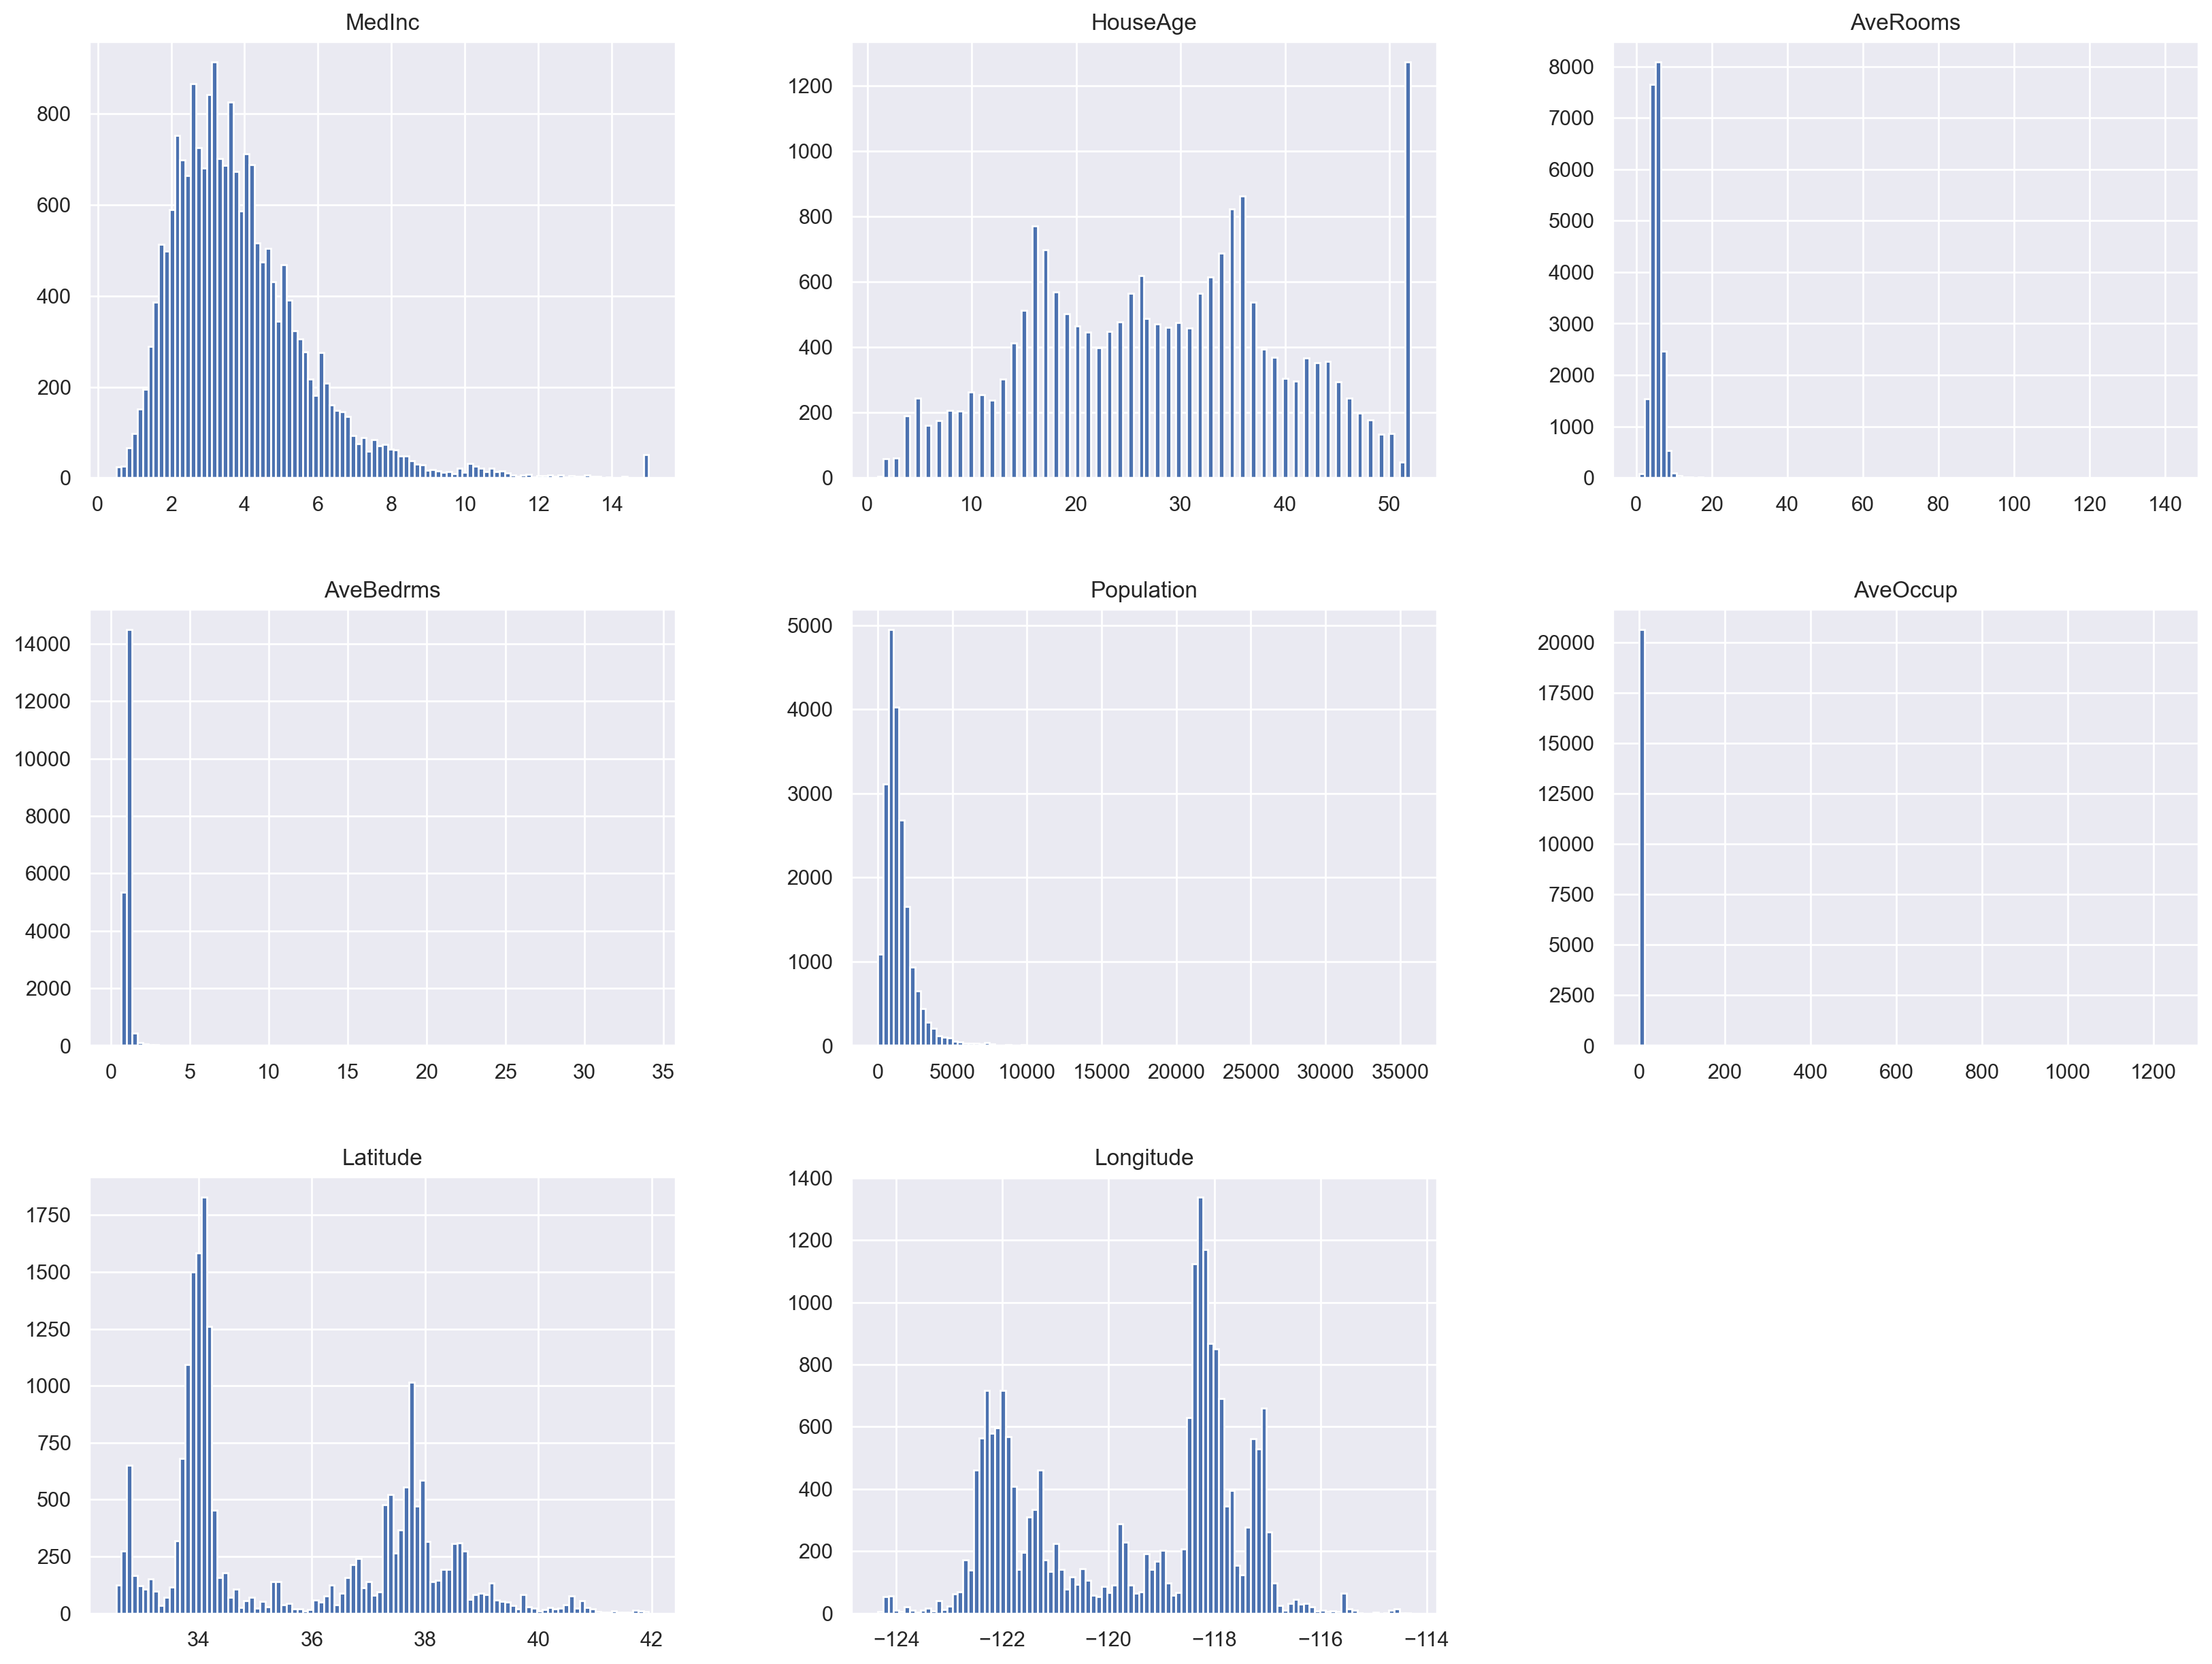

In [7]:
# make histograms of all predictors
X_df.hist(bins=100, figsize=(20,15))
plt.show()

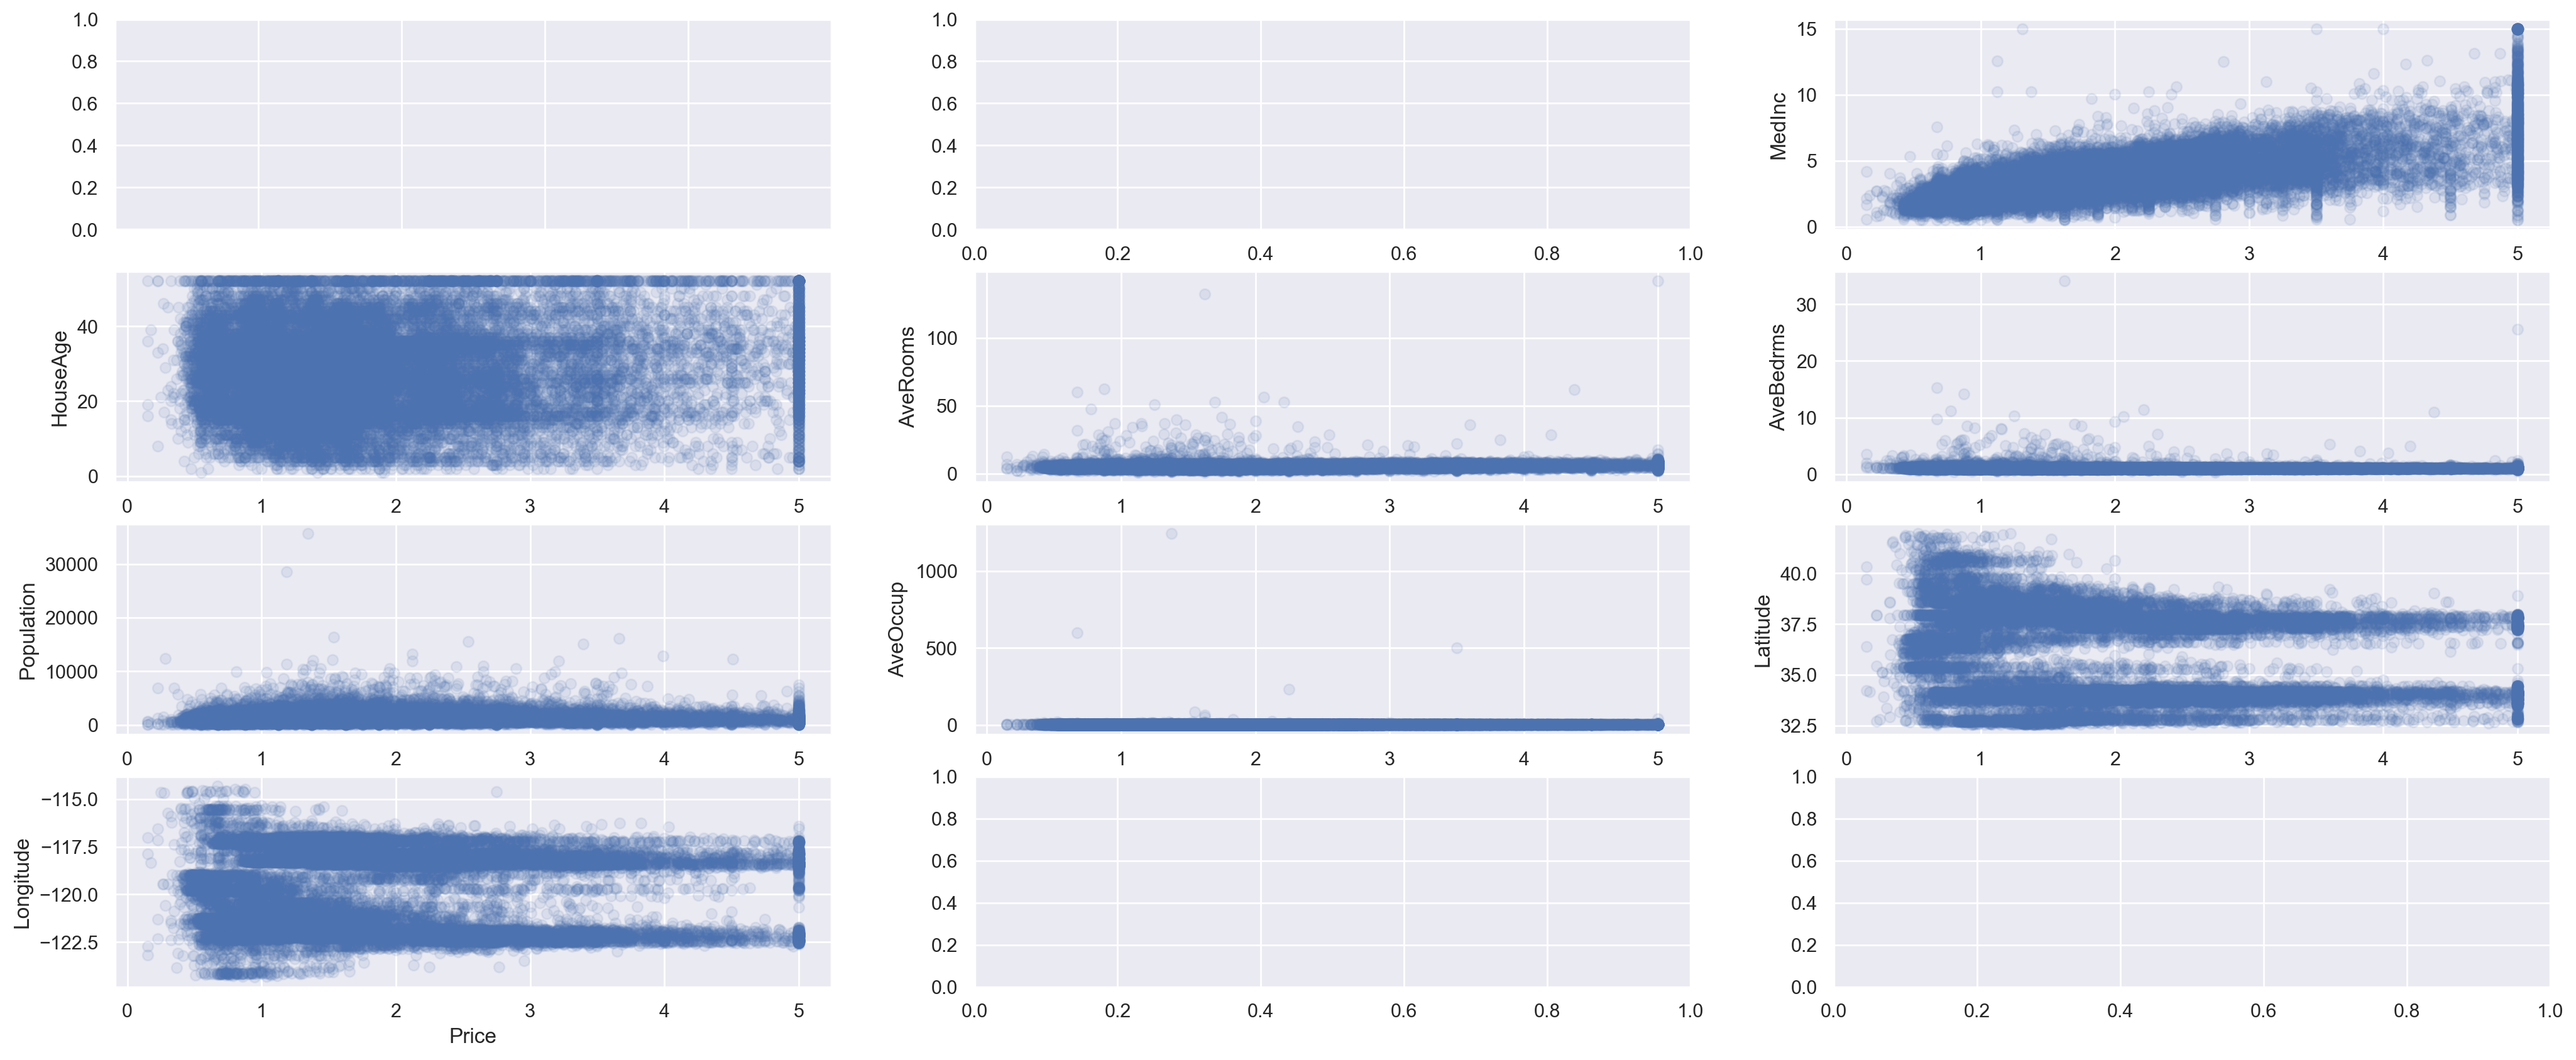

In [8]:
from seaborn import scatterplot
# make scatterplots of all predictors with the label
fig, ax = plt.subplots(4, 3, figsize=(25,10))
axe = ax.ravel()
axe[0].set_xticklabels([])
axe[0].set_xlabel(' ')
for i, feature_name in zip(range(1,11), X_df.columns):
    axe[i+1].scatter(y_full, X_df[feature_name], alpha=0.1)
    axe[i+1].set_xlabel('Price')
    axe[i+1].set_ylabel(feature_name)

# Train/Test Split

In [9]:
from tkinter import Y
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=1)

# Pre-Processing

In [10]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data
poly = PolynomialFeatures(2)
X_train_scaled_poly = poly.fit_transform(X_train)
X_test_scaled_poly = poly.fit_transform(X_test)

## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [12]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# train fractional ridge on raw predictors
frac_ridge = FracRidgeRegressorCV()
frac_ridge.fit(X_train, y_train, frac_grid=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
# report the chosen fraction penalty
print("Best frac: ", frac_ridge.best_frac_)
y_train_pred=frac_ridge.predict(X_train)
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 

# report MSE and r-squared in test set
y_test_pred = frac_ridge.predict(X_test)
test_rmse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2))

Best frac:  0.9
train R2: 0.55
test RMS: 0.7756458282128817
test R2: 0.54


In [27]:
# train fractional ridge on raw predictors
frac_ridge = FracRidgeRegressorCV()
frac_ridge.fit(X_train_scaled, y_train, frac_grid=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
# report the chosen fraction penalty
print("Best frac: ", frac_ridge.best_frac_)
y_train_pred=frac_ridge.predict(X_train_scaled)
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 

# report MSE and r-squared in test set
y_test_pred = frac_ridge.predict(X_test_scaled)
test_rmse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2))

Best frac:  1.0
train R2: -2.62
test RMS: 2.180381093112507
test R2: -2.62


In [23]:
# train fractional ridge on raw predictors
frac_ridge = FracRidgeRegressorCV()
frac_ridge.fit(X_train_scaled_poly, y_train, frac_grid=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
# report the chosen fraction penalty
print("Best frac: ", frac_ridge.best_frac_)
y_train_pred=frac_ridge.predict(X_train_scaled_poly)
print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 

# report MSE and r-squared in test set
y_test_pred = frac_ridge.predict(X_test_scaled_poly)
test_rmse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2))

Best frac:  0.1
train R2: 0.67
test RMS: 0.6707715328491923
test R2: 0.66


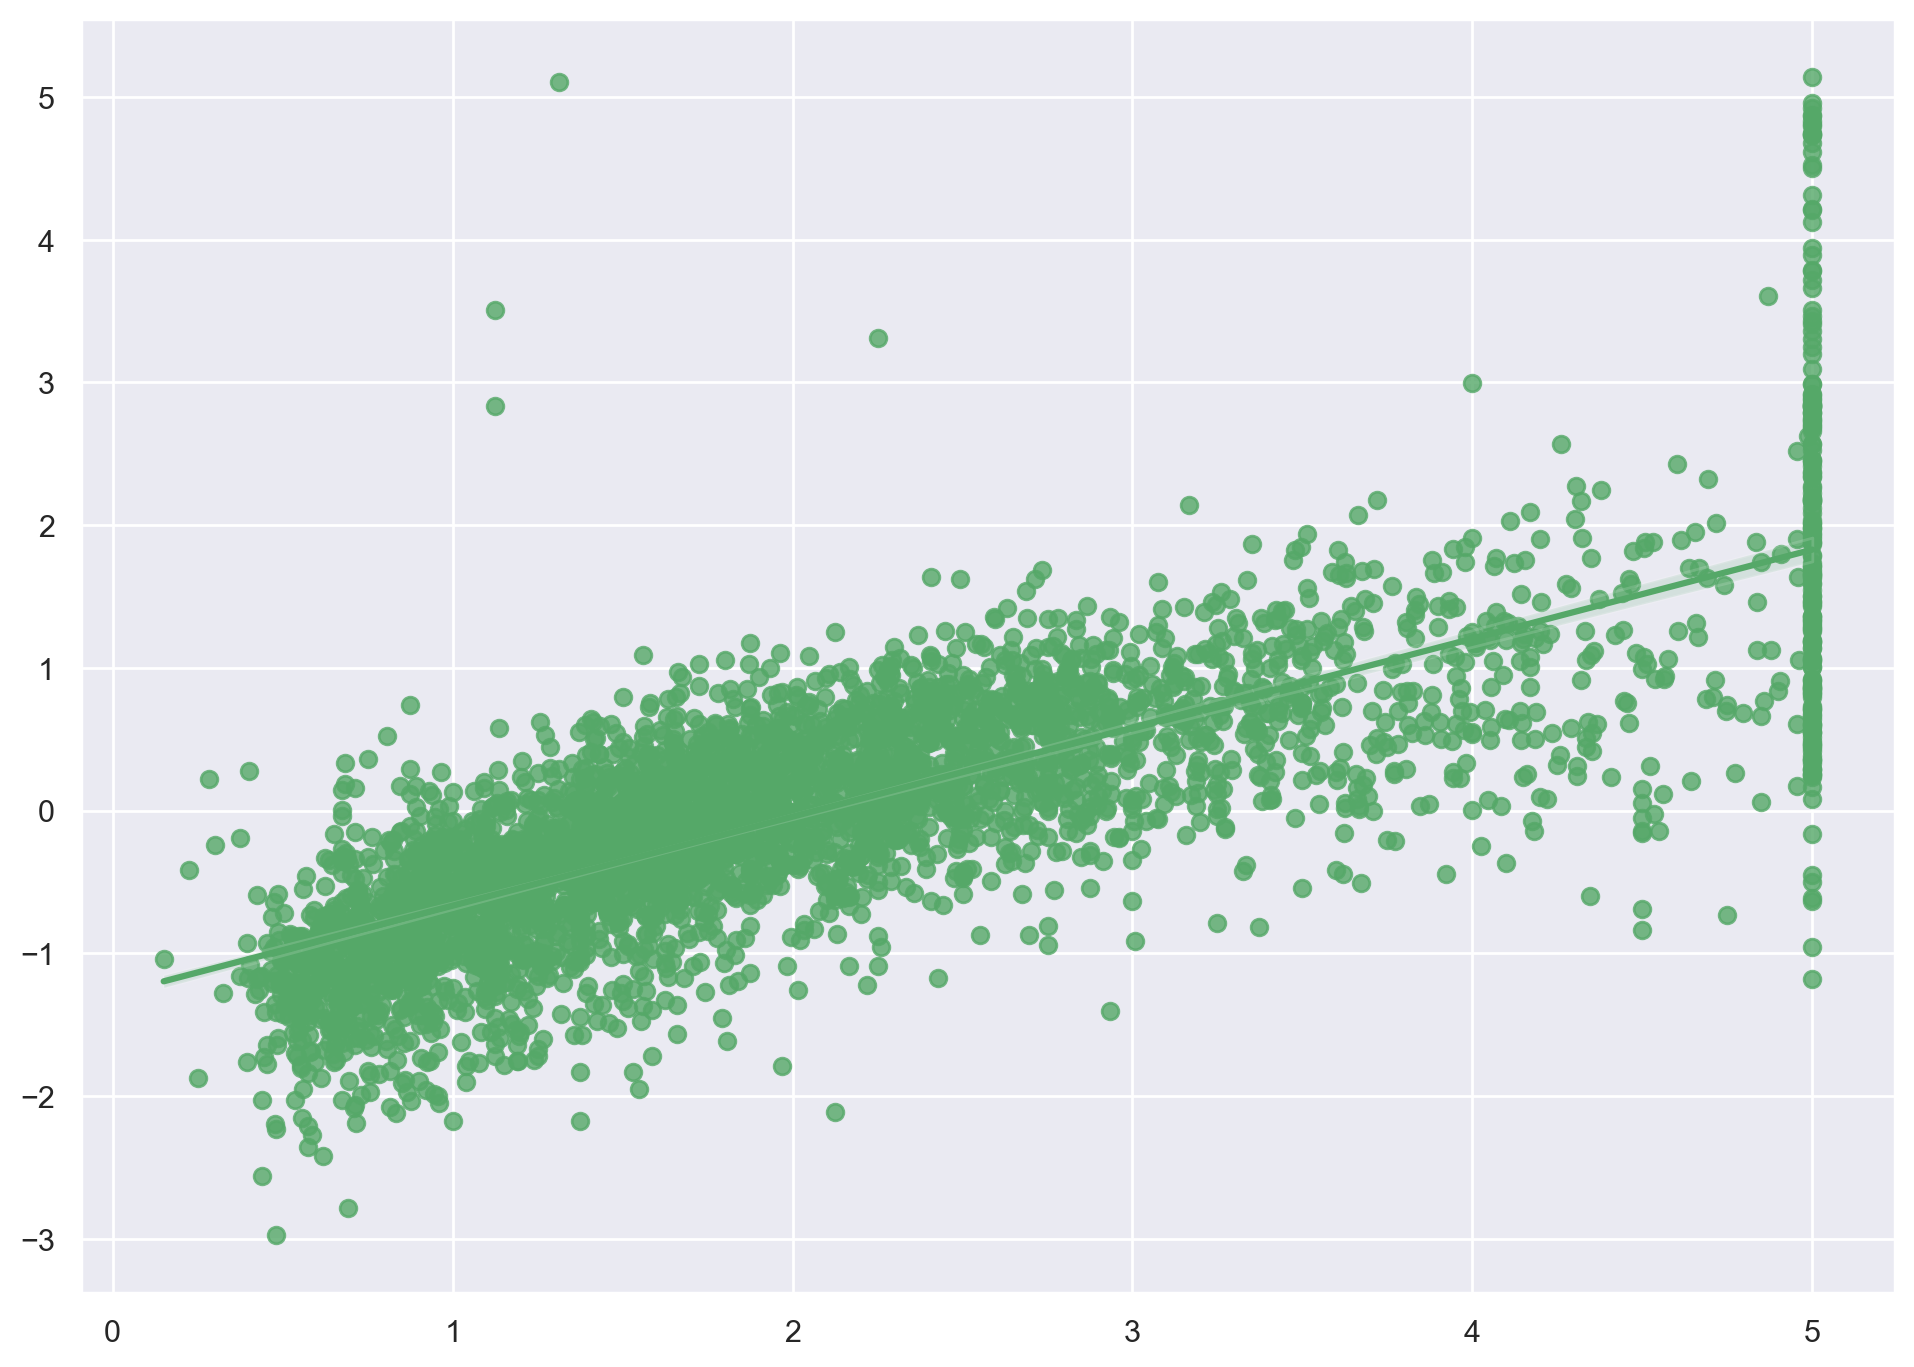

In [26]:
from seaborn import regplot
# report a binned regplot of the true outcome versus predictions in the test set
ax = sns.regplot(y=y_test_pred, x=y_test, color="g")

**How do the results change when using different predictors? Which one do you think is the best model for this task? Explain.**

> A negative R2 score for the scaled data indicates that our model is performing very poorly, not sure why it is the case. 
> Using poynomial feature expansion, the model is able to better capture the non-linearity in the data and significantly increase the R2 score and decrease the MSE. 
> I would thus choose the third model where we pre-processed the data with polynomial feature expansion 